In [1]:
import glob

car_images = glob.glob('annotations/vehicles/*/*.png')
not_car_images = glob.glob('annotations/non-vehicles/*/*.png')
print(len(car_images))
print(len(not_car_images))

8792
8968


In [2]:
def visualize(fig, rows, cols, imgs, titles):
    for i, img in enumerate(imgs):
        plt.subplot(rows, cols, i+1)
        plt.title(i+1)
        
        img_dems = len(img.shape)
        if img_dems < 3:
            plt.imshow(img, cmap='hot')
        else:
            plt.imshow(img)
        
        plt.title(titles[i])
    fig.tight_layout()

In [3]:
import numpy as np

def color_hist(img, nbins=32, debug=False):
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    
    if not debug:
        return hist_features
    else:
        bin_edges = channel1_hist[1]
        bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
        
        hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
        
        return channel1_hist, channel2_hist, channel3_hist, bin_centers, hist_features

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = mpimg.imread('annotations/vehicles/GTI_MiddleClose/image0417.png')

c1, c2, c3, bincen, feature_vec = color_hist(image, nbins=32, debug=True)
bincen *= 256

if c1 is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, c1[0])
    plt.title('Channel 1 Histogram')
    plt.subplot(132)
    plt.bar(bincen, c2[0])
    plt.title('Channel 2 Histogram')
    plt.subplot(133)
    plt.bar(bincen, c3[0])
    plt.title('Channel 3 Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...') 

In [5]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def bin_spatial(img, size=(32, 32)):
    features = cv2.resize(img, size).ravel()
    return features

Text(0.5,1,'Spatially Binned Features')

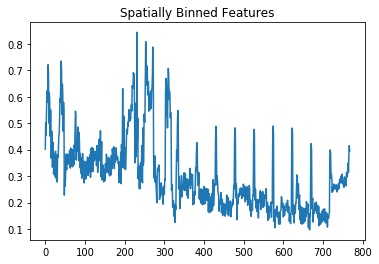

In [6]:
image = mpimg.imread('annotations/vehicles/GTI_MiddleClose/image0417.png')

feature_vec = bin_spatial(image, size=(16, 16))

plt.plot(feature_vec)
plt.title('Spatially Binned Features')

In [7]:
import cv2
from skimage.feature import hog
        
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  block_norm= 'L2-Hys',
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

Text(0.5,1,'HOG Visualization')

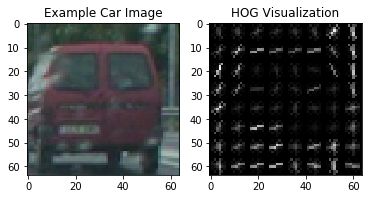

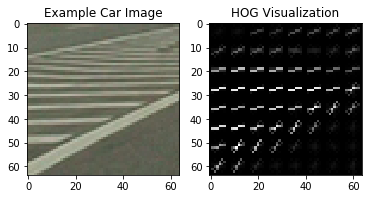

In [8]:
ind = np.random.randint(0, min(len(car_images), len(not_car_images)))

car_image = mpimg.imread(car_images[ind])
not_car_image = mpimg.imread(not_car_images[ind])

car_gray = cv2.cvtColor(car_image, cv2.COLOR_RGB2GRAY)
not_car_gray = cv2.cvtColor(not_car_image, cv2.COLOR_RGB2GRAY)

car_features, car_hog_image = get_hog_features(car_gray, orient= 9, pix_per_cell= 8, 
                                               cell_per_block= 2, vis=True, feature_vec=False)
not_car_features, not_car_hog_image = get_hog_features(not_car_gray, orient= 9, pix_per_cell= 8, 
                                                       cell_per_block= 2, vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(car_hog_image, cmap='gray')
plt.title('HOG Visualization')

fig = plt.figure()
plt.subplot(121)
plt.imshow(not_car_image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(not_car_hog_image, cmap='gray')
plt.title('HOG Visualization')

In [9]:
def convertColor(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    elif conv == 'RGB2LUV':
        converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    elif conv == 'RGB2HSV':
        converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    elif conv == 'RGB2HLS':
        converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    elif conv == 'RGB2YUV':
        converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    if conv == 'BGR2YCrCb':
        converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    elif conv == 'BGR2LUV':
        converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
    elif conv == 'BGR2HSV':
        converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    elif conv == 'BGR2HLS':
        converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    elif conv == 'BGR2YUV':
        converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        
    return converted_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


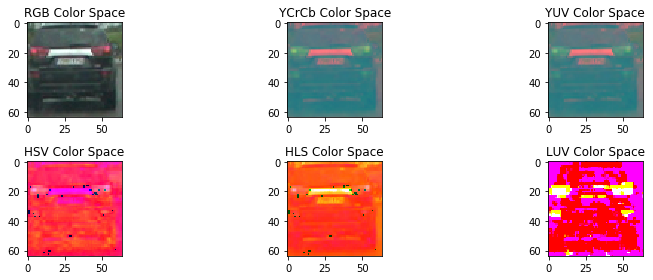

In [10]:
image = mpimg.imread('annotations/vehicles/GTI_MiddleClose/image0417.png')

ycrcb_img = convertColor(image, 'RGB2YCrCb')
yuv_img = convertColor(image, 'RGB2YUV')
hsv_img = convertColor(image, 'RGB2HSV')
hls_img = convertColor(image, 'RGB2HLS')
luv_img = convertColor(image, 'RGB2LUV')

images = [image, ycrcb_img, yuv_img, hsv_img, hls_img, luv_img]
titles = ['RGB Color Space', 'YCrCb Color Space', 'YUV Color Space', 
          'HSV Color Space', 'HLS Color Space', 'LUV Color Space']

fig = plt.figure(figsize=(12, 4))
visualize(fig, 2, 3, images, titles)

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob

def extract_features(imgs, color_space='RGB', spatial_size=(32, 32), hist_bins=32, orient=9, 
                     pix_per_cell=8, cell_per_block=2, hog_channel=0, spatial_feat=True, 
                     hist_feat=True, hog_feat=True):
    features = []
    for file in imgs:
        file_features = []
        
        image = mpimg.imread(file)
        
        if color_space != 'RGB':
            feature_image = convertColor(image, color_space)
        else: 
            feature_image = np.copy(image)   
            
        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
            
        if hog_feat == True:
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            file_features.append(hog_features)
            
        features.append(np.concatenate(file_features))
        
    return features

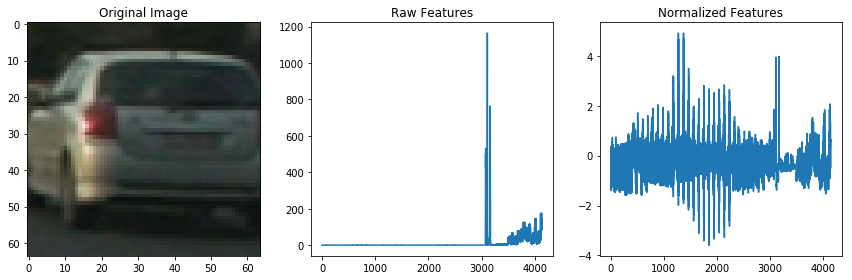

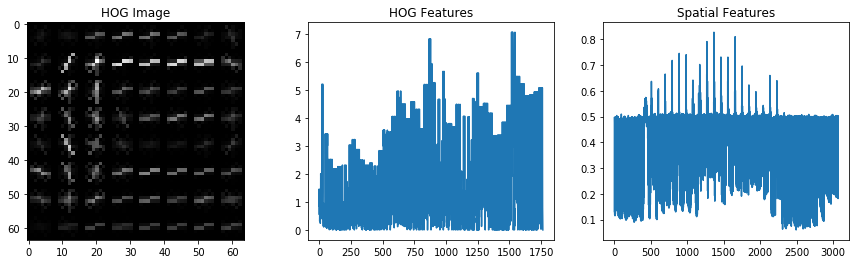

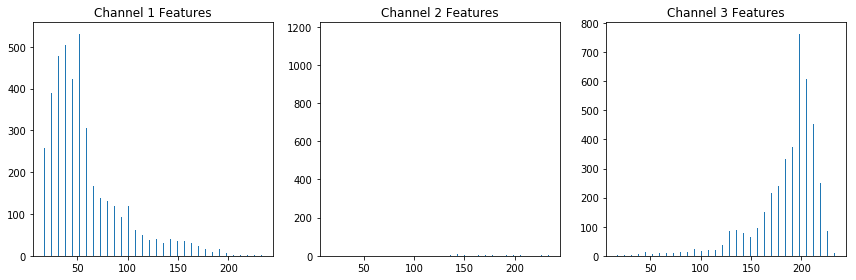

In [12]:
num_samples = 100
cars = car_images[:num_samples]
not_cars = not_car_images[:num_samples]

color_space = 'RGB2YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
spatial_size = (32, 32)
hist_bins = 32
orient = 9
pix_per_cell = 16
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

car_features = extract_features(cars, color_space=color_space, spatial_size=spatial_size, 
                                hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell, 
                                cell_per_block=cell_per_block, hog_channel=hog_channel)
notcar_features = extract_features(not_cars, color_space=color_space, spatial_size=spatial_size, 
                                   hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell, 
                                   cell_per_block=cell_per_block, hog_channel=hog_channel)

if len(car_features) > 0:
    X = np.vstack((car_features, notcar_features)).astype(np.float64)
    X_scaler = StandardScaler().fit(X)
    scaled_X = X_scaler.transform(X)
    
    car_ind = np.random.randint(0, len(cars))
    car = mpimg.imread(car_images[car_ind])
    
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(car)
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
    
    converted_car = convertColor(car, 'RGB2YCrCb')
    gray_car = cv2.cvtColor(car, cv2.COLOR_RGB2GRAY)
    spatial_features = bin_spatial(converted_car, size=(32, 32))
    c1, c2, c3, bincen, feature_vec = color_hist(converted_car, nbins=32, debug=True)
    hog_features, car_hog_image = get_hog_features(gray_car, orient= 9, pix_per_cell= 8, 
                                                   cell_per_block= 2, vis=True, feature_vec=True)
    
    fig = plt.figure(figsize=(15,4))
    plt.subplot(131)
    plt.imshow(car_hog_image, cmap='gray')
    plt.title('HOG Image')
    plt.subplot(132)
    plt.plot(hog_features)
    plt.title('HOG Features')
    plt.subplot(133)
    plt.plot(spatial_features)
    plt.title('Spatial Features')
    
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.bar(bincen*256, c1[0])
    plt.title('Channel 1 Features')
    plt.subplot(132)
    plt.bar(bincen*256, c2[0])
    plt.title('Channel 2 Features')
    plt.subplot(133)
    plt.bar(bincen*256, c3[0])
    plt.title('Channel 3 Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

In [13]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                 xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
        
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    
    window_list = []
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            window_list.append(((startx, starty), (endx, endy)))
            
    return window_list

In [14]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    imcopy = np.copy(img)
    
    for bbox in bboxes:
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
        
    return imcopy

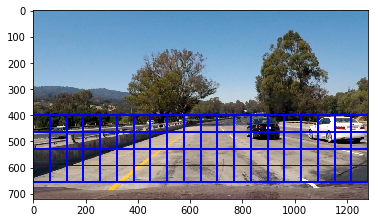

In [15]:
image = mpimg.imread('test_images/test1.jpg')
image = image.astype(np.float32)/255

x_start_stop = [None, None]
y_start_stop = [400, 656]
xy_window = (128, 128)
xy_overlap = (0.5, 0.5)

windows = slide_window(image, x_start_stop=x_start_stop, y_start_stop=y_start_stop, 
                       xy_window=xy_window, xy_overlap=xy_overlap)
                       
window_img = draw_boxes(image, windows, color=(0, 0, 1), thick=6)                    
plt.imshow(window_img)

In [16]:
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True, vis=False):
    img_features = []
    
    if color_space != 'RGB':
        feature_image = convertColor(img, color_space)
    else: 
        feature_image = np.copy(img)     
        
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        img_features.append(spatial_features)
        
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        img_features.append(hist_features)
        
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            if vis:
                hog_features, hog_image = get_hog_features(feature_image[:,:,hog_channel], orient, 
                                                           pix_per_cell, cell_per_block, vis=vis, 
                                                           feature_vec=True)
                img_features.append(hog_features)
                return np.concatenate(img_features), hog_image
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient,
                                                pix_per_cell, cell_per_block, vis=vis, 
                                                feature_vec=True)
                
        img_features.append(hog_features)

    return np.concatenate(img_features)

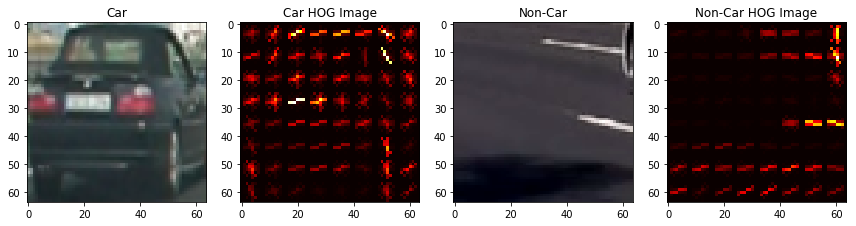

In [17]:
car_ind = np.random.randint(0, len(car_images))
not_car_ind = np.random.randint(0, len(not_car_images))

car = mpimg.imread(car_images[car_ind])
not_car = mpimg.imread(not_car_images[not_car_ind])

color_space = 'RGB2YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 656] # Min and max in y to search in slide_window()

car_features, car_hog_image = single_img_features(car, color_space=color_space, 
                                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                                orient=orient, pix_per_cell=pix_per_cell, 
                                                cell_per_block=cell_per_block, 
                                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                                hist_feat=hist_feat, hog_feat=hog_feat, vis=True)
not_car_features, not_car_hog_image = single_img_features(not_car, color_space=color_space, 
                                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                                orient=orient, pix_per_cell=pix_per_cell, 
                                                cell_per_block=cell_per_block, 
                                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                                hist_feat=hist_feat, hog_feat=hog_feat, vis=True)

images = [car, car_hog_image, not_car, not_car_hog_image]
titles = ['Car', 'Car HOG Image', 'Non-Car', 'Non-Car HOG Image']
fig = plt.figure(figsize=(12, 4))
visualize(fig, 1, 4, images, titles)

In [18]:
def search_windows(img, windows, clf, scaler, color_space='RGB',
                   spatial_size=(32, 32), hist_bins=32,
                   hist_range=(0, 256), orient=9,
                   pix_per_cell=8, cell_per_block=2,
                   hog_channel=0, spatial_feat=True,
                   hist_feat=True, hog_feat=True, 
                   confidence_thresh=0):

    on_windows = []
    for window in windows:
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        
        prediction_prob = clf.decision_function(test_features)
        if prediction_prob >= confidence_thresh:
            on_windows.append(window)
            
    return on_windows

/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


27.6919 seconds to compute features
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
1.02 Seconds to train SVC...
Test Accuracy of SVC =  0.99
10.2241 seconds to make prediction


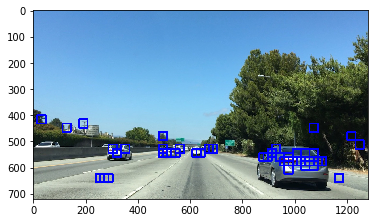

In [19]:
import time
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

color_space = 'RGB2YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 656] # Min and max in y to search in slide_window()

num_samples = 1000
cars = shuffle(car_images)[:num_samples]
not_cars = shuffle(not_car_images)[:num_samples]

t = time.time()
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(not_cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
print('{0} seconds to compute features'.format(round(time.time()-t, 4)))

X = np.vstack((car_features, notcar_features)).astype(np.float64)
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand_state)
    
X_scaler = StandardScaler(copy=False).fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

svc = LinearSVC(C=0.001)

t = time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

image = mpimg.imread('examples/bbox-example-image.jpg')
draw_image = np.copy(image)
image = image.astype(np.float32)/255

t = time.time()
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(32, 32), xy_overlap=(0.5, 0.5))
hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       
print('{0} seconds to make prediction'.format(round(time.time()-t, 4)))

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

In [20]:
def window_method(image, x_start_stop, y_start_stop, xy_window, xy_overlap, 
                  clf, scaler, color_space, spatial_size, hist_bins, orient, 
                  pix_per_cell, cell_per_block, hog_channel, spatial_feat, 
                  hist_feat, hog_feat, confidence_thresh):
    image = mpimg.imread(image)
    draw_image = np.copy(image)
    image = image.astype(np.float32)/255

    hot_windows = []
    for window in xy_window:
        windows = slide_window(image, x_start_stop=x_start_stop, y_start_stop=y_start_stop, 
                        xy_window=window, xy_overlap=xy_overlap)
        hot_windows.extend(search_windows(image, windows, clf, scaler, color_space=color_space,
                                          spatial_size=spatial_size, hist_bins=hist_bins,
                                          orient=orient, pix_per_cell=pix_per_cell,
                                          cell_per_block=cell_per_block,
                                          hog_channel=hog_channel, spatial_feat=spatial_feat,
                                          hist_feat=hist_feat, hog_feat=hog_feat, 
                                          confidence_thresh=confidence_thresh))

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)
    
    return window_img, hot_windows

3.4414 seconds to process image 1
3.4179 seconds to process image 2
3.518 seconds to process image 3
3.4942 seconds to process image 4
3.5422 seconds to process image 5
3.6802 seconds to process image 6


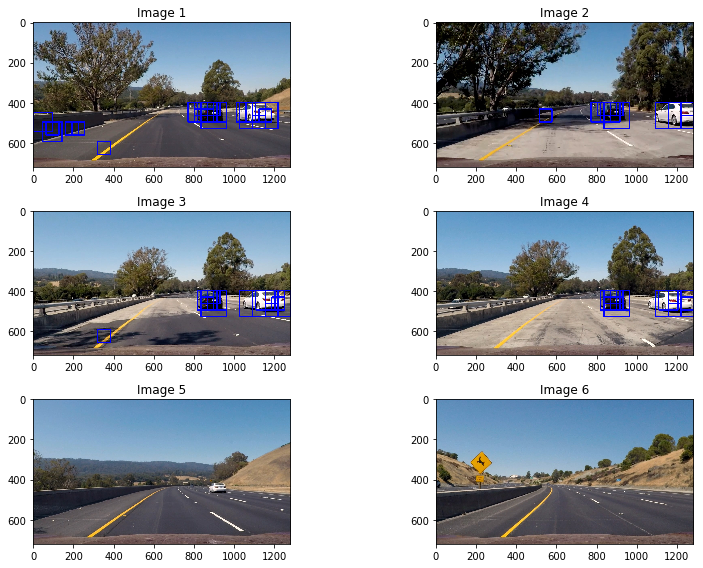

In [21]:
test_images = glob.glob('test_images/*.jpg')
images = []
titles = []

x_start_stop = [None, None]
y_start_stop = [400, 656]
xy_window = [(64, 64), (96, 96), (128, 128)]
xy_overlap = (0.5, 0.5)
confidence_thresh = 0.5
for i, image in enumerate(test_images):
    t1 = time.time()
    
    images.append(window_method(image, x_start_stop, y_start_stop, xy_window, 
                                xy_overlap, svc, X_scaler, color_space, spatial_size, 
                                hist_bins, orient, pix_per_cell, cell_per_block, 
                                hog_channel, spatial_feat, hist_feat, hog_feat,
                                confidence_thresh)[0])
    
    titles.append('Image {0}'.format(i+1))
    
    t2 = time.time()
    print('{0} seconds to process image {1}'.format(round(t2-t1, 4), i+1))
    
fig = plt.figure(figsize=(12, 8))
visualize(fig, 3, 2, images, titles)

In [22]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, y_start_stop, scales, svc, X_scaler, orient, 
              pix_per_cell, cell_per_block, spatial_size, hist_bins, confidence_thresh=0):
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[y_start_stop[0]:y_start_stop[1],:,:]
    ctrans_tosearch = convertColor(img_tosearch, conv='RGB2YCrCb')
    
    windows = []
    for scale in scales:
        if scale != 1:
            imshape = ctrans_tosearch.shape
            ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

        ch1 = ctrans_tosearch[:,:,0]
        ch2 = ctrans_tosearch[:,:,1]
        ch3 = ctrans_tosearch[:,:,2]

        # Define blocks and steps as above
        nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
        nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
        nfeat_per_block = orient*cell_per_block**2

        # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
        window = 64
        nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
        cells_per_step = 2  # Instead of overlap, define how many cells to step
        nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
        nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1

        # Compute individual channel HOG features for the entire image
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)

        for xb in range(nxsteps):
            for yb in range(nysteps):
                ypos = yb*cells_per_step
                xpos = xb*cells_per_step
                # Extract HOG for this patch
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

                xleft = xpos*pix_per_cell
                ytop = ypos*pix_per_cell

                # Extract the image patch
                subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))

                # Get color features
                spatial_features = bin_spatial(subimg, size=spatial_size)
                hist_features = color_hist(subimg, nbins=hist_bins)

                # Scale features and make a prediction
                test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
                #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
                prediction_prob = svc.decision_function(test_features)

                if prediction_prob >= confidence_thresh:
                    xbox_left = np.int(xleft*scale)
                    ytop_draw = np.int(ytop*scale)
                    win_draw = np.int(window*scale)
                    windows.append(((xbox_left, ytop_draw+y_start_stop[0]), 
                                    (xbox_left+win_draw,ytop_draw+win_draw+y_start_stop[0])))
                    cv2.rectangle(draw_img,
                                  (xbox_left, ytop_draw+y_start_stop[0]),
                                  (xbox_left+win_draw,ytop_draw+win_draw+y_start_stop[0]),
                                  (0,0,255),6) 
                
    return draw_img, windows

1.8536 seconds to process 1185 windows in image 1
1.7278 seconds to process 1185 windows in image 2
1.7213 seconds to process 1185 windows in image 3
1.8487 seconds to process 1185 windows in image 4
1.7757 seconds to process 1185 windows in image 5
1.8305 seconds to process 1185 windows in image 6


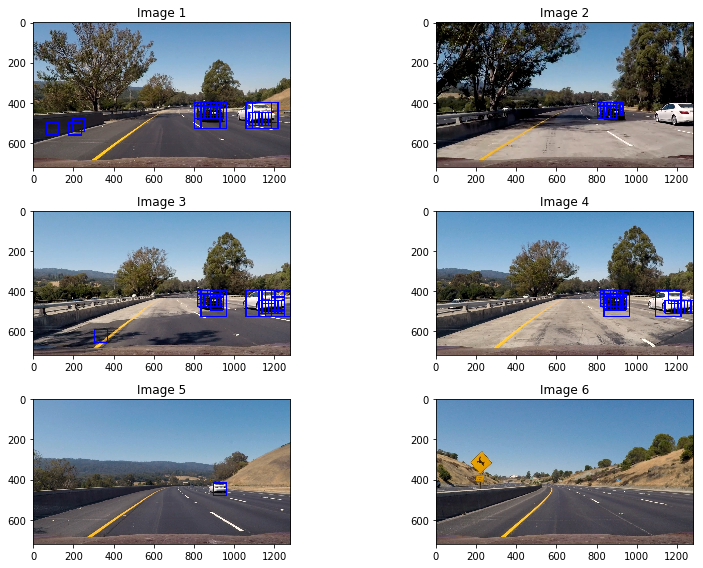

In [23]:
scale = [1, 2, 3]
images = []
titles = []

confidence_thresh = 1
for i, image in enumerate(test_images):
    t1 = time.time()
    
    image = mpimg.imread(image)
    
    images.append(find_cars(image, y_start_stop, scale, svc, X_scaler, orient, 
                            pix_per_cell, cell_per_block, spatial_size, hist_bins, 
                            confidence_thresh)[0])
    
    t2 = time.time()
    print('{0} seconds to process {1} windows in image {2}'.format(round(t2-t1, 4), len(windows), i+1))
    
    titles.append('Image {0}'.format(i+1))
    
fig = plt.figure(figsize=(12, 8))
visualize(fig, 3, 2, images, titles)

In [24]:
def addHeat(heatmap, bbox_list):
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    return heatmap

3.5376 seconds to process image 1
3.4952 seconds to process image 2
3.5918 seconds to process image 3
3.6452 seconds to process image 4
3.3652 seconds to process image 5
3.371 seconds to process image 6


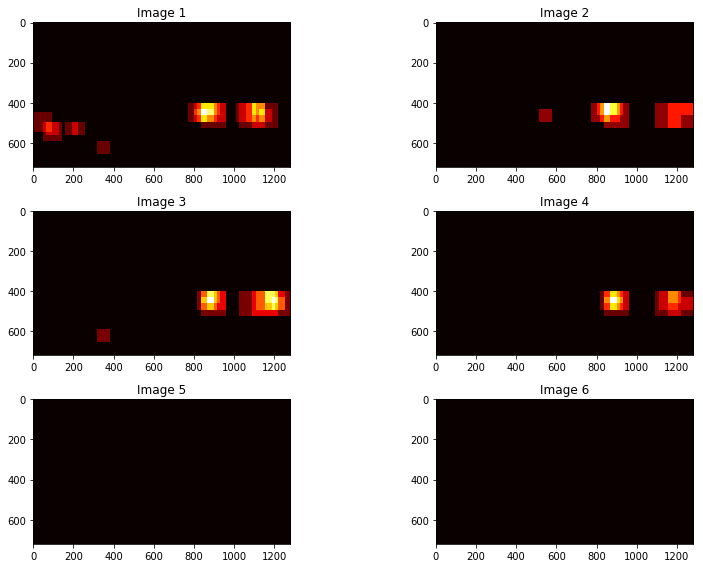

In [25]:
heatmaps = []
titles = []

x_start_stop = [None, None]
y_start_stop = [400, 656]
xy_window = [(64, 64), (96, 96), (128, 128)]
xy_overlap = (0.5, 0.5)
confidence_thresh = 0.5
for i, image in enumerate(test_images):
    t1 = time.time()
    
    img, hot_windows = window_method(image, x_start_stop, y_start_stop, xy_window,
                                     xy_overlap, svc, X_scaler, color_space, spatial_size,
                                     hist_bins, orient, pix_per_cell, cell_per_block,
                                     hog_channel, spatial_feat, hist_feat, hog_feat, 
                                     confidence_thresh)

    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    heat = addHeat(heat, hot_windows)
    heatmaps.append(heat)
    
    titles.append('Image {0}'.format(i+1))
    
    t2 = time.time()
    print('{0} seconds to process image {1}'.format(round(t2-t1, 4), i+1))
    
fig = plt.figure(figsize=(12, 8))
visualize(fig, 3, 2, heatmaps, titles)

In [26]:
def applyThreshold(heatmap, threshold):
    heatmap[heatmap <= threshold] = 0
    return heatmap

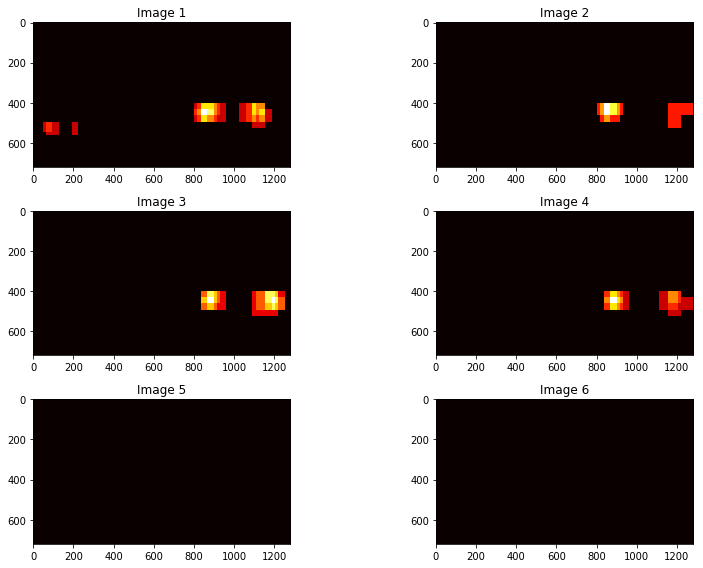

In [27]:
heat_threshold = 1
apply_heat_thresh = lambda img: applyThreshold(img, heat_threshold)
thresh_heatmaps = list(map(apply_heat_thresh, heatmaps))

fig = plt.figure(figsize=(12, 8))
visualize(fig, 3, 2, thresh_heatmaps, titles)

In [28]:
def drawLabeledBoxes(img, labels):
    imcopy = np.copy(img)
    for car_number in range(1, labels[1]+1):
        nonzero = (labels[0] == car_number).nonzero()

        # Identify x and y values of pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])

        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        cv2.rectangle(imcopy, bbox[0], bbox[1], (0,0,255), 6)

    return imcopy

Text(0.5,1,'Results Using "Sliding Window" Method')

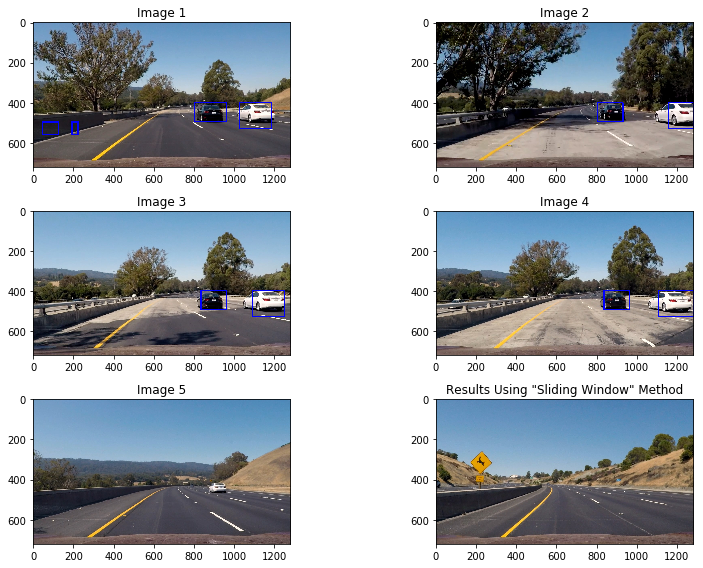

In [29]:
from scipy.ndimage.measurements import label

labeled_heatmaps = []
for heat in thresh_heatmaps:
    labeled_heatmaps.append(label(heat))

labeled_images = []
labels_and_images = zip(test_images, labeled_heatmaps)
for img, labels in labels_and_images:
    img = mpimg.imread(img)
    labeled_images.append(drawLabeledBoxes(img, labels))
    
fig = plt.figure(figsize=(12, 8))
visualize(fig, 3, 2, labeled_images, titles)
plt.title('Results Using "Sliding Window" Method')

1.8182 seconds to process 1185 windows in image 1
1.7053 seconds to process 1185 windows in image 2
1.7122 seconds to process 1185 windows in image 3
1.7284 seconds to process 1185 windows in image 4
1.7319 seconds to process 1185 windows in image 5
1.7093 seconds to process 1185 windows in image 6


Text(0.5,1,'Results Using "HOG Subsampling" Method')

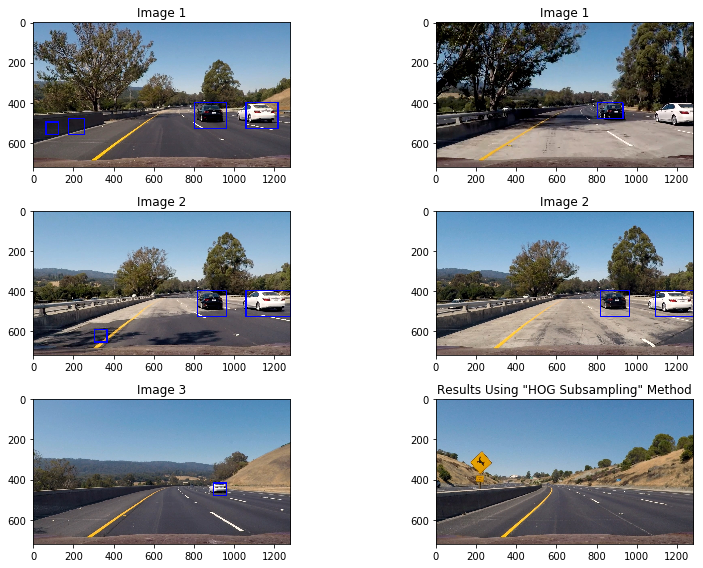

In [34]:
scale = [1, 2, 3]
heatmaps = []
titles = []

# Use find_cars() to get bounding boxes
confidence_thresh = 1
for i, image in enumerate(test_images):
    t1 = time.time()
    
    image = mpimg.imread(image)
    
    img, hot_windows = find_cars(image, y_start_stop, scale, svc, X_scaler, orient,
                                 pix_per_cell, cell_per_block, spatial_size, hist_bins, 
                                 confidence_thresh)
    
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    heat = addHeat(heat, hot_windows)
    heatmaps.append(heat)
    
    titles.append('Image {0}'.format(i+1))
    
    t2 = time.time()
    print('{0} seconds to process {1} windows in image {2}'.format(round(t2-t1, 4), len(windows), i+1))
    
    titles.append('Image {0}'.format(i+1))

# Apply threshold
heat_threshold = 0
apply_heat_thresh = lambda img: applyThreshold(img, heat_threshold)
thresh_heatmaps = map(apply_heat_thresh, heatmaps)

# Label "hot" areas
labeled_heatmaps = []
for heat in thresh_heatmaps:
    labeled_heatmaps.append(label(heat))

# Draw boxes
labeled_images = []
labels_and_images = zip(test_images, labeled_heatmaps)
for img, labels in labels_and_images:
    img = mpimg.imread(img)
    labeled_images.append(drawLabeledBoxes(img, labels))
    
fig = plt.figure(figsize=(12, 8))
visualize(fig, 3, 2, labeled_images, titles)
plt.title('Results Using "HOG Subsampling" Method')